# Семинар 2. Новые признаки. Базовая визуализация

#### <i>Малкова Ксения, Преподаватель ФКН НИУ ВШЭ</i>*

## **Типы данных** <a name="part3"></a>


<div style="text-align: center;">
<a href= "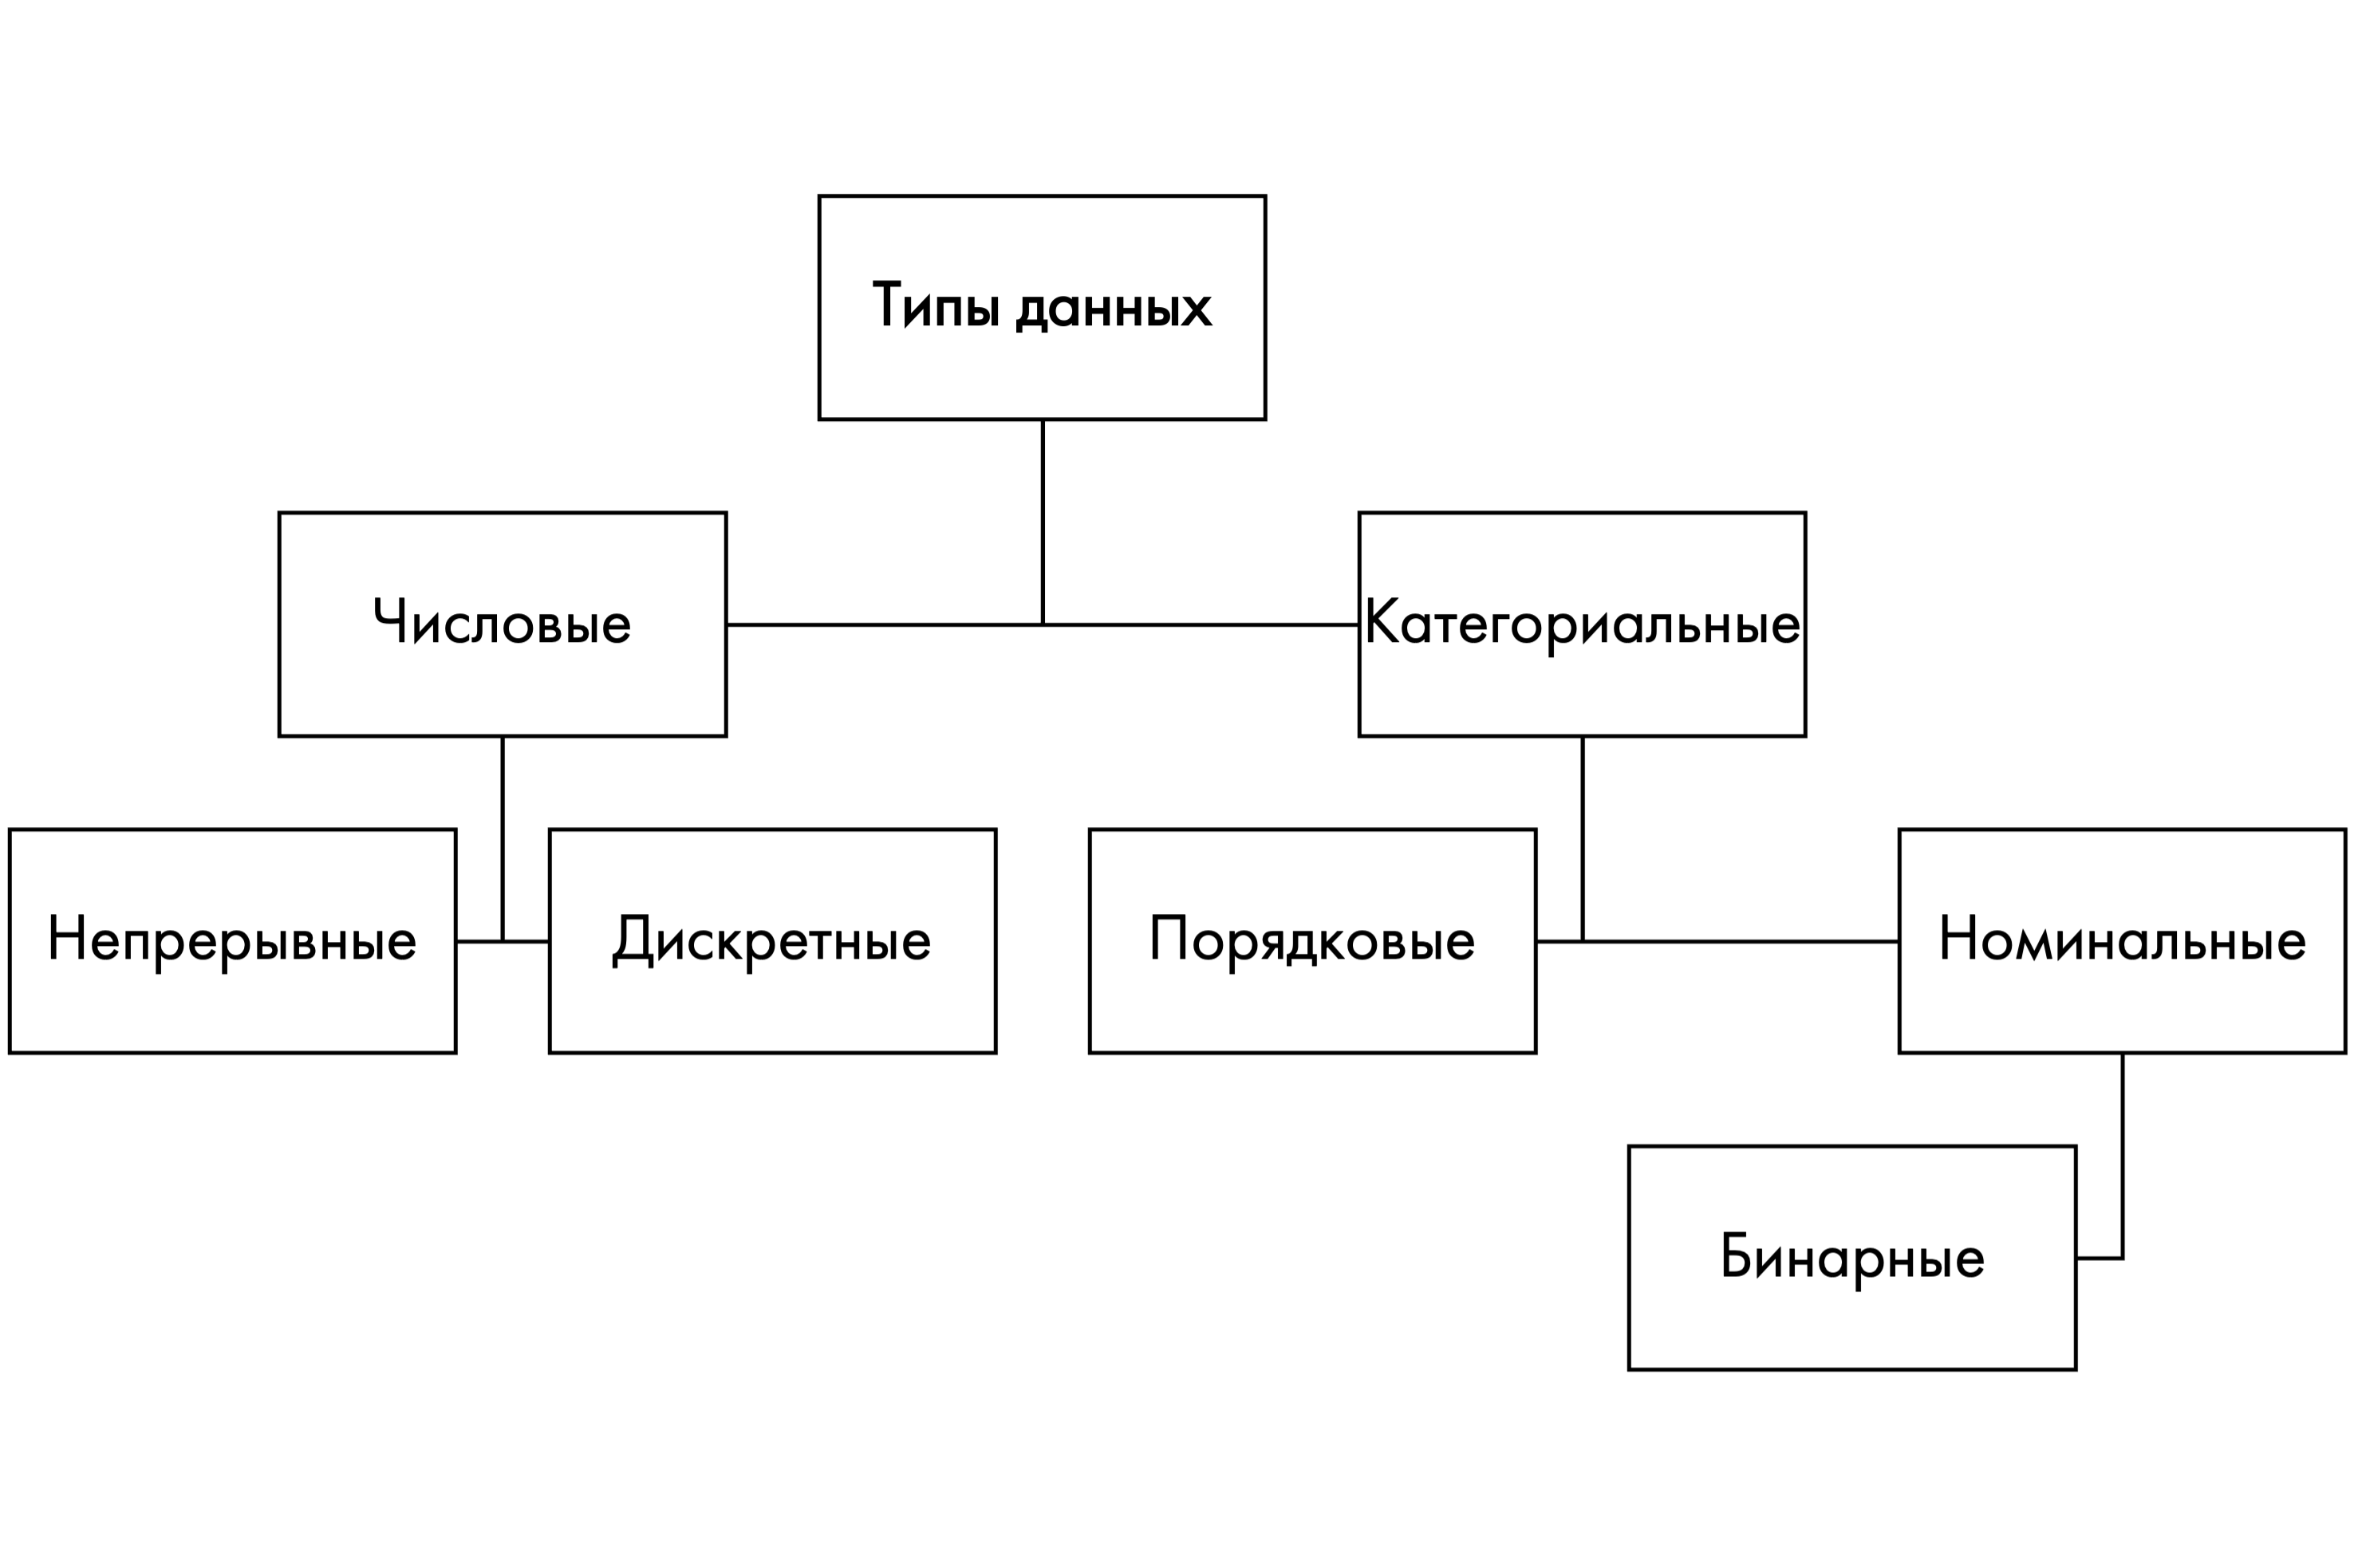">
    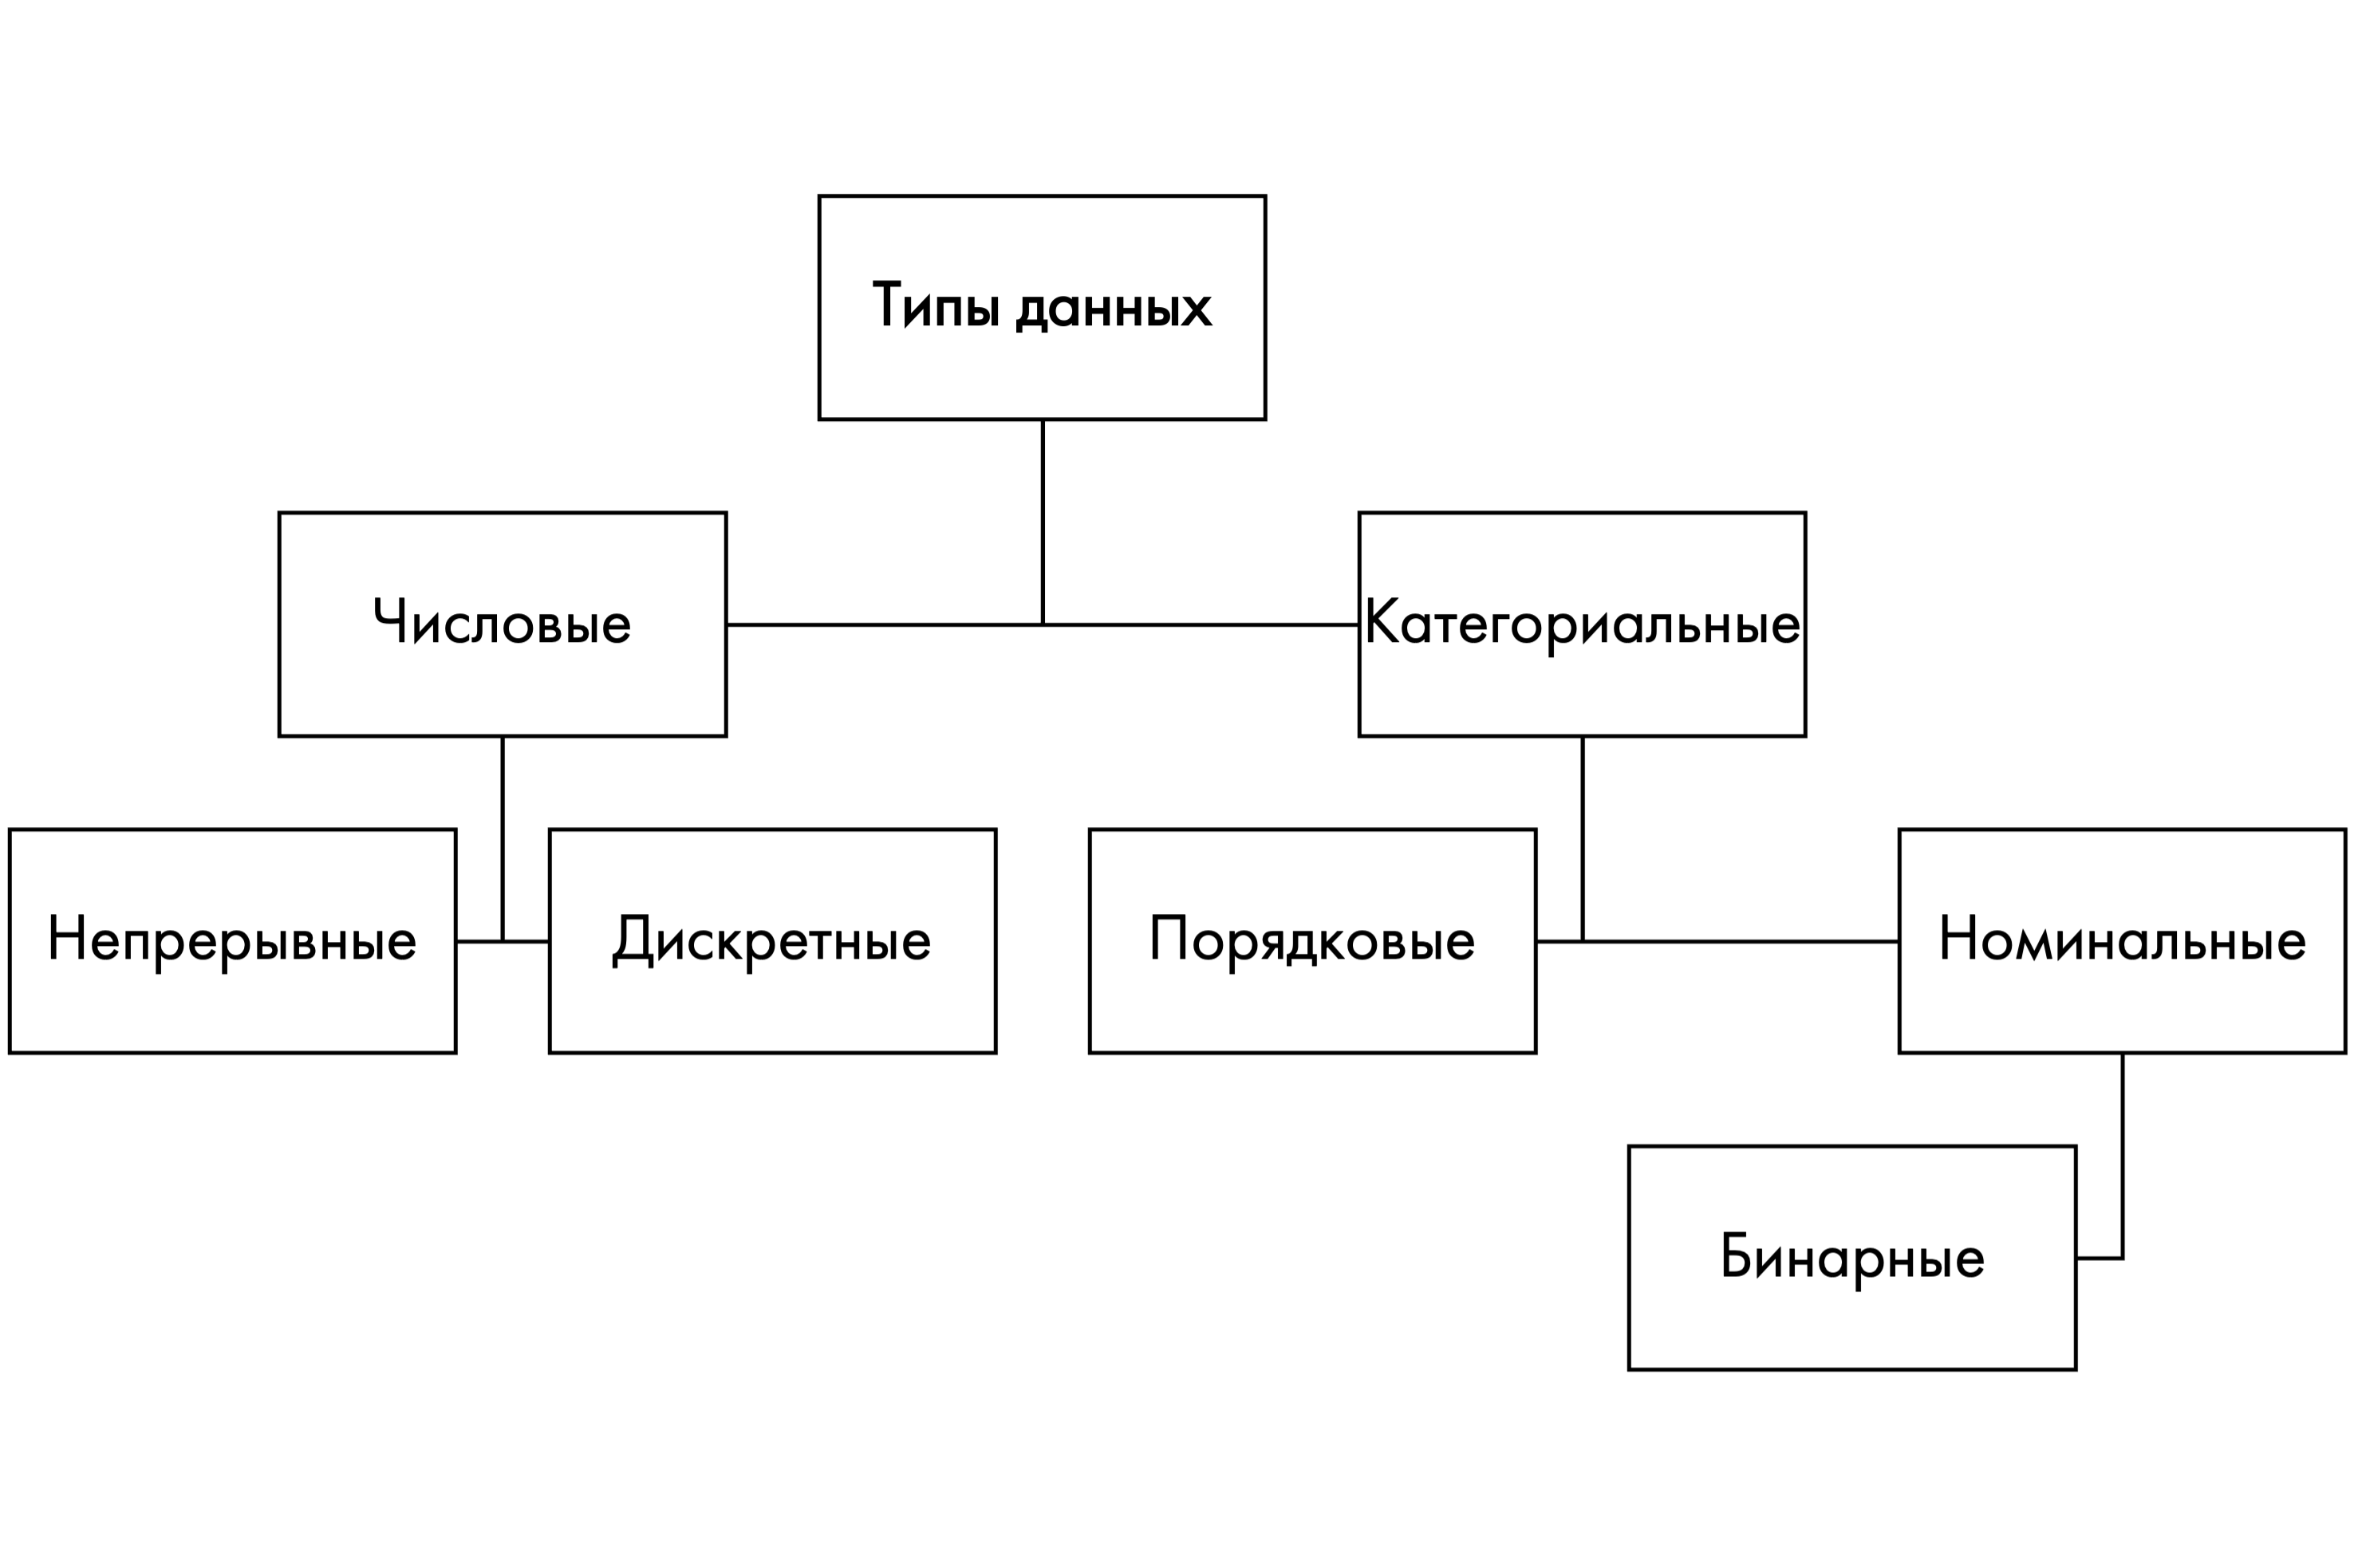
</a>
</div>

* <b> Числовые (количественные)</b>:
    + <b>Непрерывная</b> – могут принимать вещественные значения 
    + <b>Дискретная </b> - могут быть только целыми, принимать определенные значения (например, количество студентов в классе)
* <b>Категориальная* </b> – переменная с ограниченным числом уникальных значений или категорий (например, вероисповедание, уровень образования). Важно понимать, что числа, значения которых принимает категориальная переменная, не имеют такой же математической интерпретации, как у числовых переменных. <i>Делятся на</i>: 
    + <b>Порядковые (ранговые)</b> -  когда ее значения представляют категории с некоторым естественным для них упорядочением, например, уровни удовлетворенности обслуживанием от крайней неудовлетворенности до крайней удовлетворенности (или уровень образования)
    + <b>Номинальные</b> - когда ее значения представляют категории без естественного упорядочения. Примеры номинальных переменных включают регион, почтовый индекс или вероисповедание.
    + - <b>Бинарная</b> – принимает только два значения (0 и 1). Пример – статус работы респондента (вопрос опроса, на который ответ "Да" или "Нет")

Разница между <b>ранговой</b> и <b>дискретной</b> (бывают задания без уточнения):

Ранговая – обязательно <i>проранжированные</i> значения (например, "класс квартиры от 1 до 5"). Дискретная – набор значений с каким-то конкретным шагом (например, количество комнат в квартире – 1,2,3,4,5,6...,n)


<b>*</b> является дискретной, но не любая дискретная = категориальная

[Задания A3](https://edu.hse.ru/mod/quiz/view.php?id=1168825)

## Считываем данные

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Описание признаков**:
- **`PassengerId`** - id пассажира;
- **`Survived`** выжил пассажирил (1) или нет (0);
- **`Pclass`** - класс пассажира;
- **`Name`** - имя пассажира;
- **`Sex`** - пол пассажира;
- **`Age`** - возраст пассажира;
- **`SibSp`** - количество родственников (братьев, сестер, супругов) пассажира на борту;
- **`Parch`** - количество родственников (родителей / детей) пассажира на борту;
- **`Ticket`** - номер билета;
- **`Fare`** - тариф (стоимость билета);
- **`Cabin`** - номер кабины;
- **`Embarked`** - порт, в котором пассажир сел на борт (C - Cherbourg, S - Southampton, Q - Queenstown)

## 1. Создание новых признаков

Иногда нужно создать новый признак из уже существующих. Например, нам интересно, сколько всего родственников путешествовало с каждым пассажиром - просто сложим столбцы `SibSp` и `Parch` и поместим сумму в новый столбец `FamilySize`.

In [3]:
data['FamilySize'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Анонимные функции (`lambda` функции)

Создавать новые признаки также можно с помощью анонимных функций. Это особый вид функций, которые объявляются с помощью ключевого слова `lambda` вместо `def`:

```python
    lambda x: инструкция
```


Применить функцию можно с помощью метода `.apply()`

Создадим столбец `Alone` на основе признака `FamilySize`, определяет ехал человек в одиночку (**True**) или с родствениками (**False**):

In [4]:
data['Alone'] = data['FamilySize'].apply(lambda x: True if x == 0 else False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True


Так как `x == 0` - выражение, которое возвращает **True**, если условие выполняется, и **False**, если условие не выполняется, то можно *сделать более краткую запись* - она аналогична предыдущей:

In [5]:
data['Alone'] = data['FamilySize'].apply(lambda x: x == 0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True


### Функции

Можно использовать обычную функцию, которую мы создаем при помощи `def`:

```python
def name(x):
  if условие 1:
     return результат
  elif условие 2:
     return результат
  ...
  else:
     return результат
```

**Пример**

Создаем функцию `clss`, которая перекодирует признак `Pclass` следущим образом:
- *1 класс*  - **High**
- *2 класс* - **Middle**
- *3 класс* - **Low**

In [6]:
def clss(x):
  if x == 1:
    return 'High'
  elif x == 2:
   return 'Middle'
  else:
    return 'Low'

Теперь создаем новую колонку `Pclass_coded`, куда запишем результат работы нашей функции класс `clss`:

In [7]:
data['Pclass_coded'] = data['Pclass'].apply(clss)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Pclass_coded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,Low


## 2. Частотная таблица `.value_counts()`

### 2.1 Основные моменты `.value_counts()`
- Строится, как правило, по **категориальным** данным
- Показывает, сколько раз каждая уникальная категория встретилась в признаке
- Метод возвращает **тип данных** под названием `Series object`
- В `Series object` всего **два столбца**:
    1. Первый столбец - индексы (`.index`). В методе `.value_counts()` - индексы категорий.
    2. Второй столбец - значения (`.values`). В методе `.value_counts()` - сколько раз данная категория встретилась в признаке.

- **Синтаксис:**
    ```python
        датафрейм['столбец'].value_counts()
    ```

In [8]:
# Смотрим на то, что возвращает .value_counts() - два столбца
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
# Тип возвращаемых данных
type(data['Pclass'].value_counts())

pandas.core.series.Series

In [10]:
# Глянем на индексы - это уникальные категории в признаке 'Pclass'
data['Pclass'].value_counts().index

Index([3, 1, 2], dtype='int64', name='Pclass')

In [11]:
# Поглядим на значения - это частоты соответствующих категорий в признаке 'Pclass'
data['Pclass'].value_counts().values

array([491, 216, 184])

### 2.2 Сортировка в `.value_counts()` ⭐️

1) **По встречаемости категорий**

  - *От самой частой до самой редкой* - `.value_counts()` автоматически сортирует категории от самой частой до самой редкой.
    ```python
      датафрейм['столбец'].value_counts()
    ```
  - *От самой редкой до самой частой* - после применения `value_counts()` воспользуйтесь `.sort_values()`.
    ```python
      датафрейм['столбец'].value_counts().sort_values()
    ```

2) **По категориям** (индексам, первый столбец) - можем воспользоваться `.sort_index()`
  - *По возрастанию категорий* (A-Z, от 0 до N)
    ```python
      датафрейм['столбец'].value_counts().sort_index()
    ```
  - *По убыванию категорий* (Z-A, от N до 0)
    ```python
      датафрейм['столбец'].value_counts().sort_index(ascending = False)
    ```

In [12]:
# 1.1 Сортируем по встречаемости категорий: от частой (491) до редкой (184)
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [13]:
# 1.2 Сортируем по встречаемости категорий: от редкой (184) до частой (491)
data['Pclass'].value_counts().sort_values()

Pclass
2    184
1    216
3    491
Name: count, dtype: int64

In [14]:
# 2.1 Сортируем по возрастанию категорий (1 -> 3)
data['Pclass'].value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [15]:
# 2.2 Сортируем по убыванию категорий (3 -> 1)
data['Pclass'].value_counts().sort_index(ascending = False)

Pclass
3    491
2    184
1    216
Name: count, dtype: int64

### 2.3 Приведение частотной таблицы к долям

Данные в частотной таблице можно привести к долям с помощью параметра `normalize = True`:
```python
    датафрейм['столбец'].value_counts(normalize = True)
```

In [16]:
data['Pclass'].value_counts(normalize = True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

##  3. Базовая визуализация `.plot()`

### 3.1 Визуализация категориальных данных

#### 3.1.1 Столбчатая диаграмма

- Используется для **категориальных** (и **дискретных**) данных
- Помогает нам увидеть, *как часто* встречается *каждая* из *категорий*.
    - По **вертикали** (ось Y) представлены **частоты** (количество, доля или процент) для каждой категории
    - По **горизонтали** (ось X) представлены сами **категории**. Это могут быть любые номинальные или порядковые данные (например, классы пассажиров, пол, порты отправления и т.д.).
- Между столбцами есть промежутки! 

- **Синтаксис:**
    ```python
        датафрейм['столбец'].value_counts().plot(kind = 'bar')
    ```

<Axes: xlabel='Pclass'>

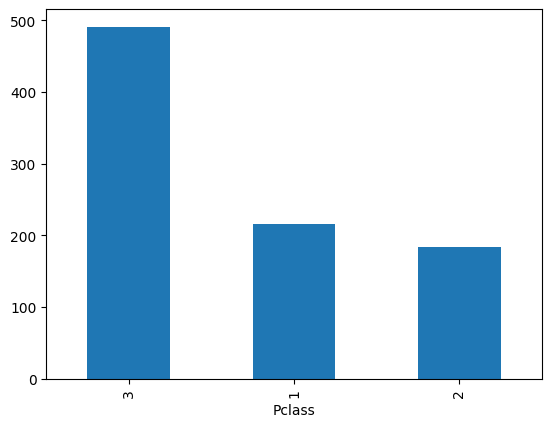

In [17]:
data["Pclass"].value_counts().plot(kind = 'bar')

<Axes: xlabel='Pclass'>

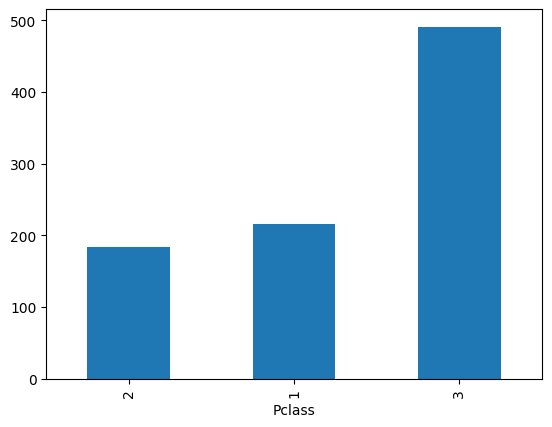

In [18]:
data["Pclass"].value_counts().sort_values().plot(kind = 'bar')

<Axes: xlabel='Pclass'>

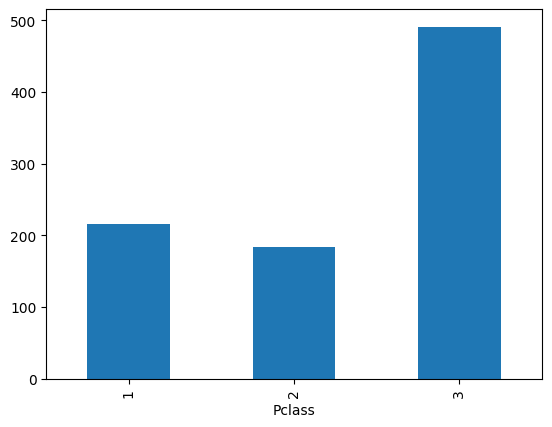

In [19]:
data["Pclass"].value_counts().sort_index().plot(kind = 'bar')

<Axes: xlabel='Pclass'>

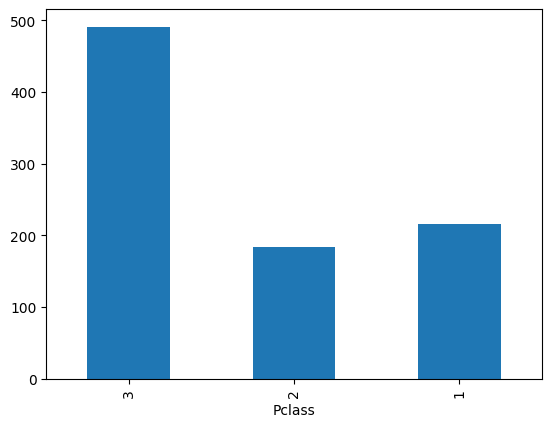

In [20]:
data["Pclass"].value_counts().sort_index(ascending = False).plot(kind = 'bar')

#### 3.1.2 Круговая диаграмма

- Используется для **категориальных** данных
- Каждый сектор диаграммы представляет одну категорию и показывает, какую долю (или процент) от общего количества занимает эта категория
- Можно быстро увидеть, какая категория занимает наибольшую долю.
- **Синтаксис:**
    ```python
        датафрейм['столбец'].value_counts().plot(kind = 'pie')
    ```


<Axes: ylabel='count'>

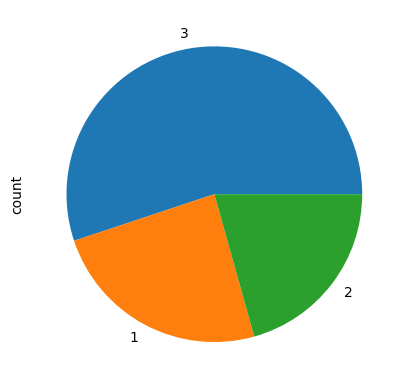

In [21]:
data["Pclass"].value_counts().plot(kind = 'pie')

#### 3.1.3 Линейный график
- Лучше всего подходят для непрерывных данных, но в принципе можно использовать для категориальных данных
- Как и столбчатая диаграмма показывает, как разные категории соотносятся друг с другом по количеству или процентам
- **Синтаксис:**

    ```python
        датафрейм['столбец'].value_counts().plot()
    ```

❗️Рисовать линейный график для категориальных (и даже дискретных) данных - **не совсем корректно**:
- Соединение точек создает впечатление, что между категориями существуют значения, которых на самом деле нет. Например, если мы соединим значения для классов (1, 2, 3), это может ввести в заблуждение, так как между категориями **нет промежуточных значений** (например, 1.1 или 1.5).
- **Линейные графики подразумевают, что данные непрерывные**, что не соответствует природе категориальных данных

Тем не менее, так иногда делают :) Поэтому всегда уточняйте, к какому типу принадлежат признак(-и), чтобы не интерпретировать их неверно.

<Axes: xlabel='Embarked'>

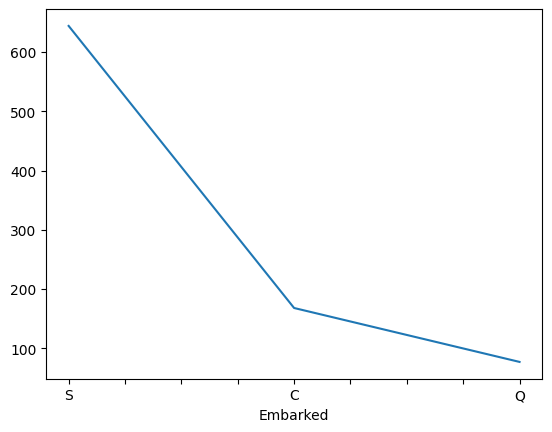

In [22]:
data["Embarked"].value_counts().plot()

### 3.2 Визуализация числовых данных

#### 3.2.1 Гистограмма распределения

- Используется для **числовых непрерывных** данных
- Помогает нам увидеть *частоту значений в некоторых диапазонах* (их еще называют "бинами", "корзинами" или "интервалами"). Иначе говоря, гистограмма показывает показывает *распределение данных по интервалам*.
    - По **горизонтали** (ось X) представлены *интервалы* (или "корзины") значений, в которые разбиваются данные. Каждый интервал охватывает определенный диапазон значений.
    - По **вертикали** (ось Y) представлены *количества наблюдений* (или частоты), *попадающих в каждый интервал*. Высота столбца указывает, сколько раз значения в этом диапазоне встречаются в наборе данных.
- Между столбцами нет промежутков! 

- **Синтаксис:**
    ```python
        датафрейм['столбец'].plot(kind = 'hist')
    ```

<Axes: ylabel='Frequency'>

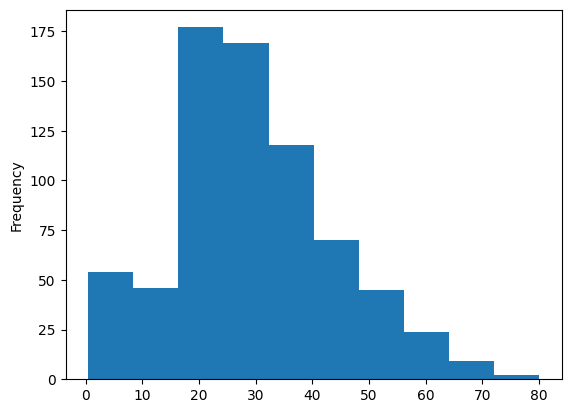

In [23]:
data['Age'].plot(kind='hist')

❗️По **вертикальной** оси также может быть отображена *вероятность* "встретить" данное значение признака. В таких случаях график также называется **гистограммой**, но имя вертикальной оси сменяется на **плотность вероятности**

<Axes: >

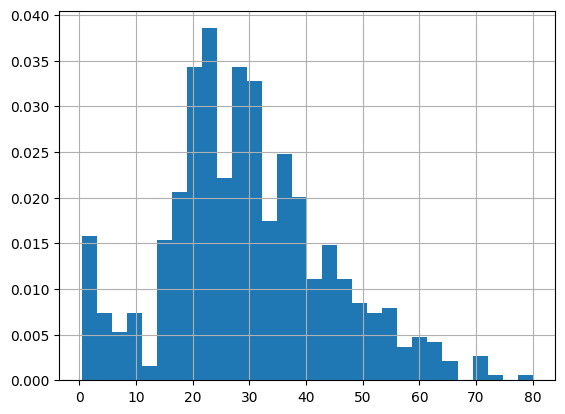

In [24]:
data['Age'].hist(density=True, bins=30)

#### 3.2.2 Столбчатая диаграмма
- Используется для **числовых дискретных** данных
- Аналогично столбчатой диаграмме для категориальных данных
- Между столбцами есть промежутки!
- **Синтаксис:**
    ```python
        датафрейм['столбец'].value_counts().plot(kind = 'bar')
    ```

<Axes: xlabel='Parch'>

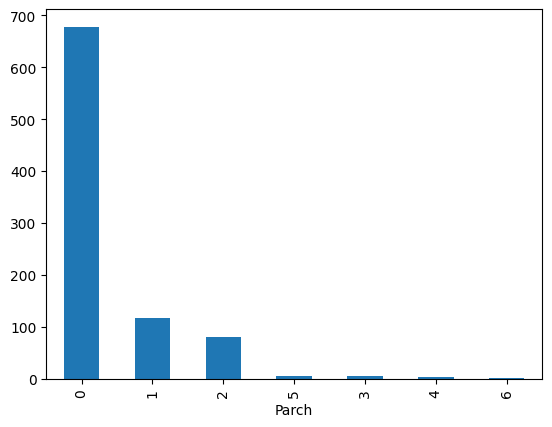

In [25]:
data['Parch'].value_counts().plot(kind='bar')

#### 3.2.3 Ящик с усами

- Используется для **числовых непрерывных** данных
- Помогает наглядно представить основные статистические характеристики распределения. Что конкретно - на семинаре с описательными статистиками, не пропустите :)
    - По **вертикали** (ось Y) представлен *признак(-и)*, который мы анализируем
    - По **горизонтали** (ось X) представлены *значения признака (-ов)*, которую (-ые) мы анализируем
- **Синтаксис:**
    ```python
        датафрейм['столбец'].plot(kind = 'box', vert = False)
    ```

<Axes: >

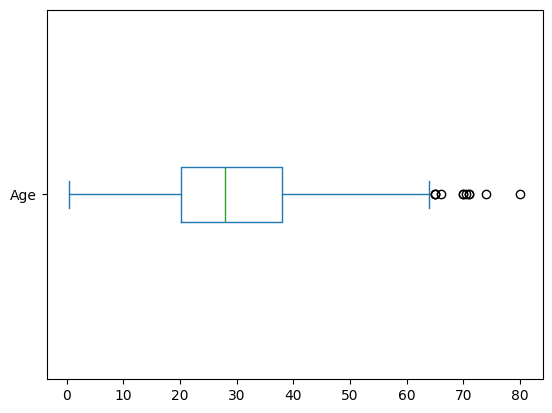

In [26]:
data['Age'].plot(kind='box', vert = False)

#### 3.2.4 Диаграмма рассеяния

- Используется для **числовых** данных (чаще - непрерывных, но можно и дискретных)
- Используется, чтобы показать *зависимость между числовыми признаками*
    - По **горизонтали** (Ось X) представлены *значения одной из переменных*. Это может быть любая количественная переменная, которую мы хотим анализировать
    - По **вертикали** (Ось Y) представлены *значения другой переменной*. Также это количественная переменная, с которой мы сравниваем первую
    - Каждая **точка** на диаграмме представляет **одно наблюдение**, с координатами, соответствующими значениям двух переменных
 
- **Синтаксис:**
    ```python
        датафрейм.plot('столбец X', 'столбец Y', kind = 'scatter')
    ```

<Axes: xlabel='Age', ylabel='Fare'>

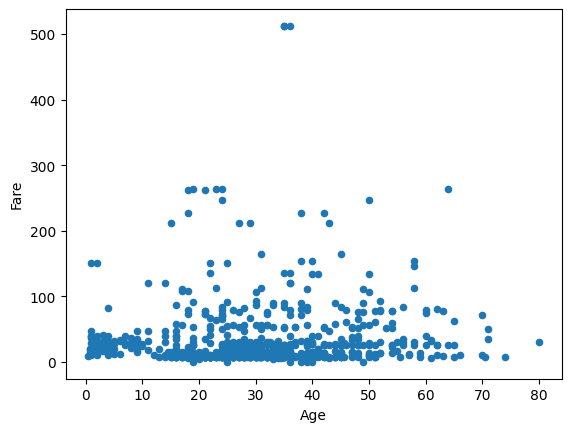

In [27]:
data.plot('Age', 'Fare', kind = 'scatter')

#### 3.2.5 Линейный график
- Как правильно, используется для отображения количественных показателей с **течением времени**. Иначе говоря, демонстрирует **тренды, сезонность и другие паттерны в динамике по времени**. 
    - По **горизонтали** (Ось X)  обычно представлен *временной интервал* (даты, месяцы, годы)
    - По **вертикали** (Ось Y) представлены *значения переменной*, которую мы анализируем. Это может быть любая количественная переменная, изменение которой мы хотим проанализировать во времени. 

- Например: 
    - Средняя температура воздуха по дням в январе
    - Объем продаж по месяцам
    - Число пользователей веб-сайта за последнйи год

В `titanic` датасете нет данных о времени, поэтому прочитаем другую таблицу - https://raw.githubusercontent.com/ejgao/Time-Series-Datasets/refs/heads/master/monthly-beer-production-in-austr.csv

И нарисуем месячное потребление пива (OY) по месяцам с 1956 по 2014 год (OX)

<Axes: xlabel='Month'>

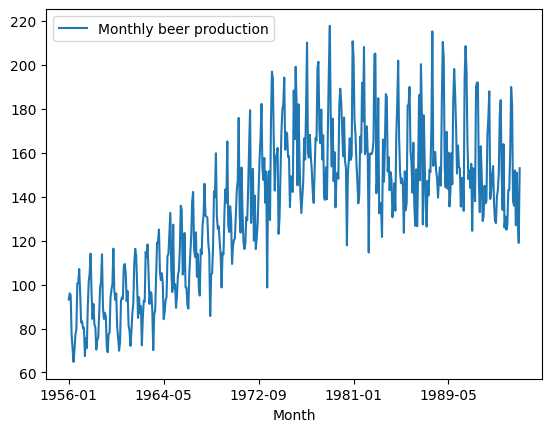

In [28]:
data_electric = pd.read_csv('https://raw.githubusercontent.com/ejgao/Time-Series-Datasets/refs/heads/master/monthly-beer-production-in-austr.csv')

data_electric.plot('Month', 'Monthly beer production')

## Задания НЭ

- [A1](https://edu.hse.ru/mod/quiz/view.php?id=1143488) — соотнесение графиков и верных утверждений
- [A2](https://edu.hse.ru/mod/quiz/view.php?id=1143491) — аналогично A1, но множественный выбор
- [A7](https://edu.hse.ru/mod/quiz/view.php?id=1156118) — гистограмма и столбчатая диаграмма, какому признаку соответствует (единичный выбор)